In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, norm, expon


The Director of Investments for a small, private K-12 school manages an endowment with a current balance of $538,000.  The funds are invested in a portfolio whose annual returns varies and can be represented as a normally distributed random variable with a mean of 6% and a standard deviation of 2%.

A new scholarship is being created as a memorial to a distinguished alumna.  The legal terms of the endowment require the Director of Investments to determine a constant scholarship payment amount from the endowment that, if made at the end of each of the next 15 years, would result in only a 5% chance of the endowment's ending value dropping below its current value.  Create a simulation model to make a recommendation for a scholarship amount that achieves this goal.

In [2]:
## Simulation model for Endowment

begin_balance = 538000
num_years = 15
exp_return = .06
sd_return = .02

Balance = pd.DataFrame(columns = ['Begin', 'Return', 'Earning', 'End'])

for i in np.arange(1, num_years + 1):
    if (i == 1) :
        Balance.loc[i, 'Begin'] = begin_balance
    else :
        Balance.loc[i, 'Begin'] = Balance.loc[i-1, 'End']

    Balance.loc[i, 'Return'] = norm.rvs(size = 1, loc = exp_return, scale = sd_return).item()
    Balance.loc[i, 'Earning'] = Balance.loc[i, 'Return'] * Balance.loc[i, 'Begin']
    Balance.loc[i, 'End'] = Balance.loc[i, 'Begin'] + Balance.loc[i, 'Earning']

Balance = Balance.set_axis(['Year_' + str(n) for n in np.arange(1, num_years + 1)])
Balance

,Begin,Return,Earning,End
Year_1,538000,0.106328,57204.527405,595204.527405
Year_2,595204.527405,0.063686,37906.1892,633110.716605
Year_3,633110.716605,0.044089,27913.217429,661023.934034
Year_4,661023.934034,0.05466,36131.784821,697155.718855
Year_5,697155.718855,0.043476,30309.467619,727465.186474
Year_6,727465.186474,0.056712,41255.96752,768721.153994
Year_7,768721.153994,0.052002,39974.668984,808695.822978
Year_8,808695.822978,0.126115,101989.011344,910684.834322
Year_9,910684.834322,0.067183,61182.883332,971867.717654
Year_10,971867.717654,0.050567,49144.098404,1021011.816059


In [3]:
norm.rvs(size = 1, loc = .06, scale = .02).item()

0.06777568250894082

In [4]:
num_years = 10
np.arange(1, num_years + 1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Some Pandas syntax

In [5]:
## Select column in Pandas DataFrame

#  Balance[ , c('Return', 'End')]

#Balance[['Return', 'End']]
#Balance.End
#Balance[['End']]  # returns column as Dataframe instead of Series

## Select rows by row label

#Balance.loc['Year_2']
#Balance.loc[['Year_2']]
#Balance.loc[['Year_2', 'Year_5']]
#Balance.loc['Year_2':'Year_7']

## Select invidual cells by row label and column

#Balance.loc['Year_14', 'End']
#Balance.loc['Year_14'].End


## Select rows by integer position of index

#Balance.iloc[[4]]
Balance.iloc[len(Balance) - 1].End


1383988.1570035038

In [6]:
CAGR = (Balance.iloc[len(Balance) - 1].End / Balance.iloc[0].Begin) ** (1/num_years) - 1
CAGR

0.09909443724626077

In [7]:
## Simulation Trials

begin_balance = 538000
num_years = 15
exp_return = .06
sd_return = .02

num_trials = 10000

Endowment = pd.DataFrame(columns = ['Year_' + str(n) for n in np.arange(0, num_years + 1)])

for t in np.arange(1, num_trials + 1) :
    Endowment_year = [begin_balance]
    for y in np.arange(1, num_years + 1) :
        Endowment_year.append(Endowment_year[y-1] * (1 + norm.rvs(size = 1, loc = exp_return, scale = sd_return).item()))
    Endowment.loc[t] = Endowment_year


In [8]:
Endowment


,Year_0,Year_1,Year_2,Year_3,Year_4,Year_5,Year_6,Year_7,Year_8,Year_9,Year_10,Year_11,Year_12,Year_13,Year_14,Year_15
1,538000.0,580453.164623,628275.349994,671049.941214,722224.952632,733874.612026,756066.137483,814128.369398,899984.585482,976861.285384,1.029821e+06,1.086792e+06,1.181136e+06,1.266796e+06,1.345893e+06,1.418900e+06
2,538000.0,568724.134948,604638.757327,644515.230886,689140.074284,731032.563923,780481.162768,845644.963919,901856.900822,949764.527242,1.016094e+06,1.101393e+06,1.170166e+06,1.260827e+06,1.313561e+06,1.442129e+06
3,538000.0,573847.805534,600181.909303,634679.864079,674758.739488,710168.521097,765910.717172,790390.014127,837850.410460,912062.854240,9.623203e+05,1.034795e+06,1.073834e+06,1.091734e+06,1.155752e+06,1.218066e+06
4,538000.0,571948.842871,609520.804981,646736.407715,666812.034092,682616.378382,710945.664099,790194.996565,832566.443945,870896.533630,9.328158e+05,1.014619e+06,1.071139e+06,1.127459e+06,1.172300e+06,1.230167e+06
5,538000.0,557728.271343,584664.742649,644592.928306,649225.314004,681426.945673,734755.759122,761124.095889,822380.811713,871671.610984,9.328781e+05,9.699728e+05,1.052156e+06,1.156714e+06,1.193128e+06,1.276668e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,538000.0,579353.490958,618541.478367,657061.205511,701356.293208,746671.837869,762400.200508,789163.545608,833725.934767,894164.183470,9.511951e+05,1.014860e+06,1.106552e+06,1.185902e+06,1.241331e+06,1.321518e+06
9997,538000.0,580742.097668,623506.205218,649790.920242,695447.884127,724989.870841,761217.033298,804050.850912,894681.075632,931365.414502,1.001736e+06,1.073553e+06,1.130260e+06,1.201343e+06,1.288859e+06,1.358221e+06
9998,538000.0,568379.931239,600488.085811,633588.299646,678498.099382,715868.791903,762747.614107,802613.378817,822025.496115,894356.042183,9.339127e+05,9.791669e+05,1.054654e+06,1.110161e+06,1.157761e+06,1.207138e+06
9999,538000.0,560446.968263,595171.810883,633924.723492,664184.501282,722416.664073,748380.371136,802448.699020,855665.850339,886517.678215,9.525096e+05,1.002379e+06,1.032404e+06,1.108656e+06,1.162141e+06,1.194988e+06


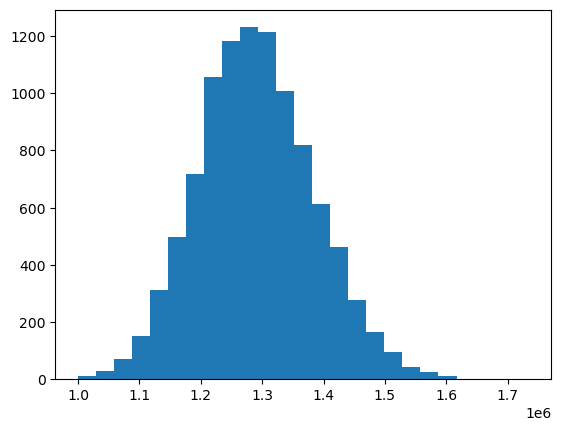

In [9]:
plt.hist(Endowment['Year_15'], bins = 25)
plt.show()

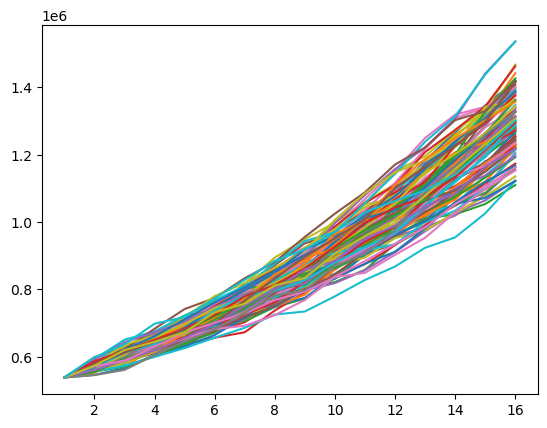

In [10]:
fig, ax = plt.subplots()

for y in range(1, 101) :
    ax.plot(range(1, 17), Endowment.loc[y])
  
plt.show()

In [11]:
## Scholarship What-If

begin_balance = 538000
num_years = 15
exp_return = .06
sd_return = .02

num_trials = 5000

scholarship_range = np.arange(26000, 28000, 100)
SimOutput = pd.DataFrame(columns = ['Prob_Lose_Principal'], index = scholarship_range)

for k in scholarship_range :
    Endowment = pd.DataFrame(columns = ['Year_' + str(n) for n in np.arange(0, num_years + 1)])

    for t in np.arange(1, num_trials + 1) :
        Endowment_year = [begin_balance]
        for y in np.arange(1, num_years + 1) :
            Endowment_year.append(Endowment_year[y-1] * \
                                  (1 + norm.rvs(size = 1, loc = exp_return, scale = sd_return).item()) - k)
        Endowment.loc[t] = Endowment_year

    SimOutput.loc[k, 'Prob_Lose_Principal'] = sum(Endowment['Year_15'] < Endowment['Year_0'])/len(Endowment['Year_15'])

        

In [14]:
scholarship_range = np.arange(24000, 30000, 500)
scholarship_range

array([24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000,
       28500, 29000, 29500])